# Bem vindo ao notebook de análise dos dados do spotify 🤘🎶🎙️

### Importando os pacotes necessários

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Fazendo a leitura inicial dos dados

In [4]:
data = pd.read_csv('songs_normalize.csv')

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


### Hipótese: As músicas mais dançantes são mais populares

Imaginamos, em um primeiro momento, que poderia existir uma relação entre a dançabilidade e a popularidade da música. A melhor forma de ver essa correlação, ao nosso ver, seria o mapa de calor.

<AxesSubplot:>

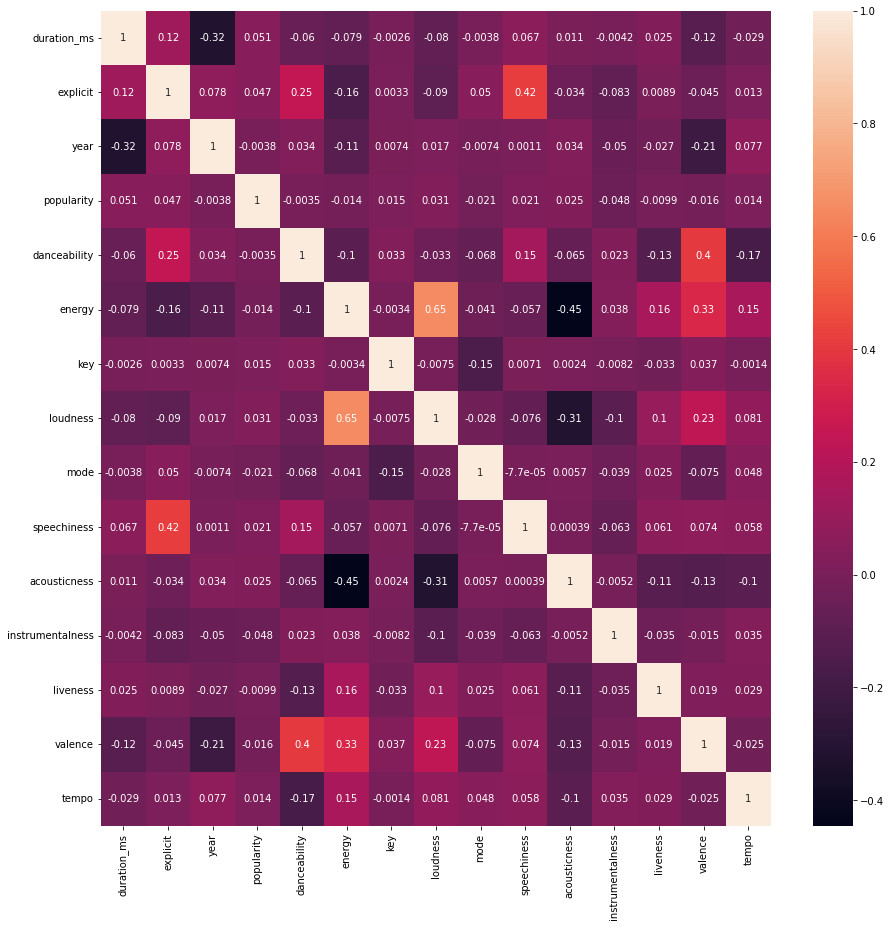

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)

Pelo mapa de calor, observa-se que não existe uma relação entre a popularidade e qualquer uma das outras variáveis. Existe, porém, uma relação entre as músicas explícitas e que possuem voz, o que faz muito sentido, já que uma música explícita (considerada ofensiva ou inapropriada para crianças) precisa de palavras para ser categorizada dessa forma.

Também notável que existe uma relação entre a dançabilidade e a valência (categorizadas como músicas positivas, como músicas felizes, alegres, entre outros) o que também faz sentido.

A maior relação, porém, é a entre energia e o volume (em decibéis) da música. Podemos afirmar que é uma relação, de certa forma, evidente, já que a energia é medida pela intensidade e atividade da música,

### Hipótese: Os gêneros mais populares variam com o passar dos anos

A indústria da música parece cíclica, com alguns gêneros se mantendo em alta por algum tempo, porém decaindo aos poucos com outros gêneros assumindo os seus lugares. Podemos verificar se essa impressão se confirma através dos dados.

In [6]:
# Passo 1: separando os gêneros
genres = list(data.genre.str.split(", "))

# Passo 2: pegando o maior número de gêneros
max_number_of_genres = max([len(genre) for genre in genres])

max_number_of_genres

4

In [7]:
# Passo 3: definindo função
# Função para separar o gênero das músicas
# A função seleciona a tabela gênero, a transforma em um string, e faz a separação usando a vírgula como separador
# O parâmetro 'expand' faz com que o resultado da separação seja dividido em colunas
# Caso não exista um valor para a coluna, a coluna é preenchida com 'None'
# Feita a separação em 4 colunas pelo fato de o maior número de gêneros ser 4
def split_genres(df):
    df[["genre_1", "genre_2", "genre_3", "genre_4"]] = df.genre.str.split(", ",expand=True)
    return df

# Passo 4: chamando a função e salvando o resultado em um novo dataframe
data_with_splitted_genres = (data.pipe(split_genres))

# Passo 5: removendo a coluna 'genre' que não será mais utilizada
new_data = data_with_splitted_genres.drop(columns='genre')

# Visualizando as primeiras linhas do novo dataframe
new_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre_1,genre_2,genre_3,genre_4
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,None,None,None
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock,pop,None,None
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop,country,None,None
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock,metal,None,None
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,None,None,None


In [8]:
# Passo 6: criando novos dataframes com apenas uma coluna de gênero

# Criando lista para armazenar os dataframes temporariamente
df_list = list()

for index in range(1, 5):
    new_df = new_data[['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', f'genre_{index}']]
    
    # Renomeando coluna gênero
    new_df = new_df.rename(columns={f'genre_{index}': 'genre'})
    
    # Removendo valores nulos
    new_df = new_df[new_df['genre'].notnull()]
    
    # Adicionando os dataframes na lista
    df_list.append(new_df)

# Unindo os dataframes
# O atributo ignore_index deve ser utilizado para o novo dataframe concatenado não ficar com o index quebrado
united_df = pd.concat(df_list, ignore_index=True)

# Descartando dados duplicados
united_df.drop_duplicates(keep='first')

# Visualizando o novo dataframe
united_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [9]:
# Passo 7: verificando o número de gêneros
len(united_df['genre'].unique())

15

Como o número de gêneros era muito grande, decidimos fazer um recorte, pegando os gêneros com mais de 100 ocorrências.

<AxesSubplot:xlabel='year', ylabel='popularity'>

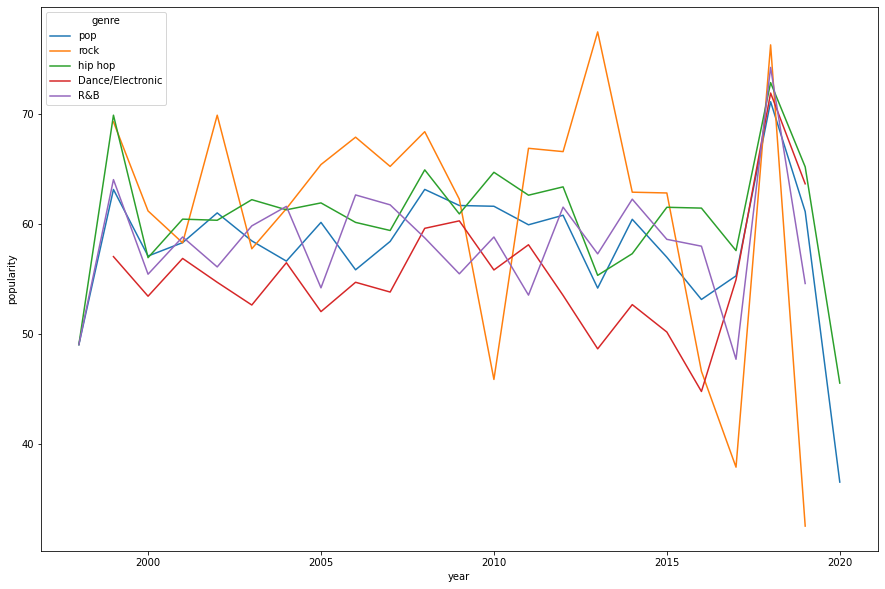

In [10]:
# Passo 8: fazendo o recorte
# Criando uma máscara
split_genres_mask = united_df["genre"].isin(united_df['genre'].value_counts().index[united_df['genre'].value_counts() > 100])

# Aplicando a máscara
split_genres_df = united_df[split_genres_mask]

# Passo 9: plotando os dados
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='year', y='popularity', data=split_genres_df, hue='genre', ci=None)

Chegamos em um gráfico interessante. A maior parte dos gêneros com um maior número de ocorrências manteve uma constância, com poucas exceções. A exceção mais notável se dá entre 2015 e 2020, com uma subida e uma queda abrupta de todos os gêneros.

Notável também a variação do rock, que em 2010 esteve com a sua menor popularidade, e em 2013 atingiu o seu pico, tendo uma quebra abrupta em seguida, seguindo a variação de todos os demais gêneros.